In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/data.csv')
df.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [14]:
df = df.replace("?", np.nan)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [15]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [16]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [17]:
df=df.drop(columns=['slope', 'ca', 'thal'])
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [18]:
df=df.fillna(df.median())
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [19]:
[col for col in df.columns if 'num' in col]

['num       ']

In [20]:
X = df.drop(columns=['num       '])   
y = df['num       ']   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr=lr
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
    def fit(self, X, y):
        y=np.where(y<=0,-1,1)
        n_samples, n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition=y[idx]*(np.dot(x_i,self.w)+self.b)>=1
                if condition:
                    dw=2 * self.lambda_param*self.w
                    db=0
                else:
                    dw=2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                    db= -y[idx]
                self.w -= self.lr* dw
                self.b -= self.lr*db
    def predict(self, X):
        linear_output=np.dot(X, self.w)+self.b
        return np.where(linear_output >= 0, 1, 0)
    def decision_function(self, X):
        return np.dot(X, self.w) + self.b

    def predict_proba(self, X):
        scores = self.decision_function(X)
        return 1 / (1 + np.exp(-scores))  # sigmoid

        

In [33]:
svm_scratch = SVM(lr=0.001, lambda_param=0.01, n_iters=2000)
svm_scratch.fit(X_train_scaled, y_train.values)
y_pred_scratch = svm_scratch.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall:", recall_score(y_test, y_pred_scratch))
print("F1 Score:", f1_score(y_test, y_pred_scratch))

Accuracy: 0.847457627118644
Precision: 0.7727272727272727
Recall: 0.8095238095238095
F1 Score: 0.7906976744186046


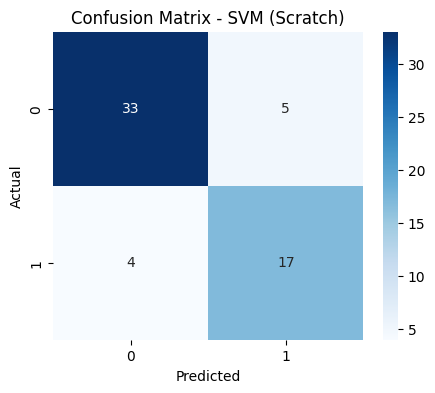

In [36]:
y_pred_binary = np.where(y_pred_scratch == 1, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM (Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

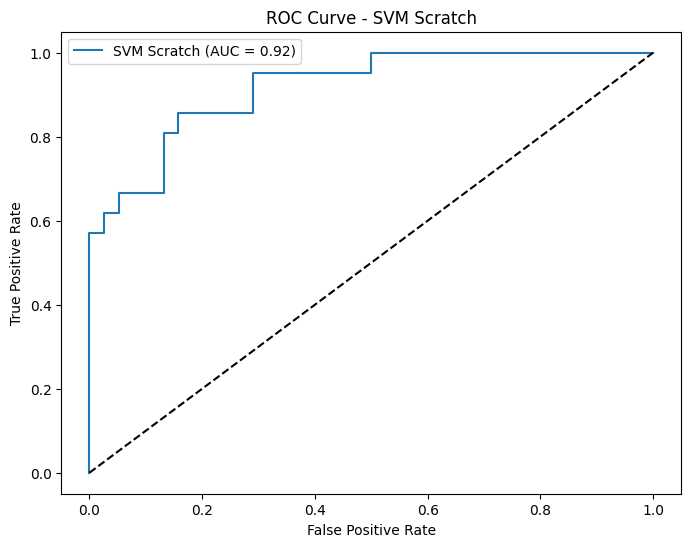

In [40]:
from sklearn.metrics import roc_curve, auc
y_prob_scratch = svm_scratch.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob_scratch)
roc_auc_svm_scratch = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"SVM Scratch (AUC = {roc_auc_svm_scratch:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Scratch")
plt.legend()
plt.show()
